<h1 align="center"> CSE 242 Assignment 3, Spring 2025

    Name: Mengxiao Hu   Student ID: mhu110(2172399)

## Instruction 

- Submit your assignments onto **Canvas** by the due date. Upload a **PDF** file containing:

    (1) Your solutions for both math questions.
    
    **For assignment related questions, please reach TA or grader through Slack/Discord/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** Perceptron (math)
- **Task 2:** Support Vector Machine (math)

# Question 1. (Perceptron, 50 pts)

## (a -- 10 pts)

On what kinds of training data does the perceptron algorithm converge?

The perceptron algorithm converges when the training data is linearly separable.

## (b -- 5*4 + 20 pts) 

Simulate one pass through the following data with the perceptron algorithm described in lecture and homework.
Use the learning rate $\eta = 1$. 

Start with $w=(0,0,0)$ and show the resulting weight vector after each example.

(Assume that the perceptron algorithm predicts incorrectly when $w \cdot x = 0$, and ignore the bias term.)

| $x_1$  | $x_2$ | $x_3$ |   $y$ |
| :--- | :--- | :--- | :--- |
| 1 | 0 | 1 |  +1|
| 0 | -1 | 1 |  -1|
| 1 | 1 | 1 | +1|
| -1 | 2 | 0 |  -1|

After the first example, $w = ( 1, 0, 1)$

After the second example, $w = ( 1, 1, 0)$

After the third example, $w = ( 1, 1, 0)$

After the fourth example, $w = ( 2, -1, 0)$.

Initially, $w = ( 0, 0, 0)$. With $x = (1, 0, 1)$, $y = +1$

$w \cdot x = 0$, the prediction is incorrect.

Update: $w \leftarrow w + \eta y x = (1, 0, 1)$

Then with $x = (0, -1, 1)$, $y = -1$

$w \cdot x = 1$, $y (w \cdot x) = -1 \leq 0$, the prediction is incorrect.

Update: $w \leftarrow w + \eta y x = (1, 1, 0)$

Then with, $x = (1, 1, 1)$, $y = +1$

$w \cdot x = 2$, $y (w \cdot x) = 2 > 0$, the prediction is correct.

Update: No update needed.

Then with $x = (-1, 2, 0)$, $y = -1$

$w \cdot x = 1$, $y (w \cdot x) =  -1 \leq 0$, prediction is incorrect.

Update: $w \leftarrow w + \eta y x = (2, -1, 0)$

# Question 2. (Support Vector Machines, 50 pts)
Suppose that we have the following training set (where the instances have two features):

| $x_1$ | $x_2$ | $y$ |
| :--- | :--- | :--- |
| 1 | 1  |  +1|
| 1 | 2  |  +1|
| 2 | 1  |  +1|
| 0 | 0  |  -1|
| 1 | 0  |  -1|
| 0 | 1  |  -1|

## (a -- 35 pts) 

Plot them and find the support vectors, with python `sklearn`.


Support vectors: 
[[1. 0.]
 [0. 1.]
 [1. 1.]]


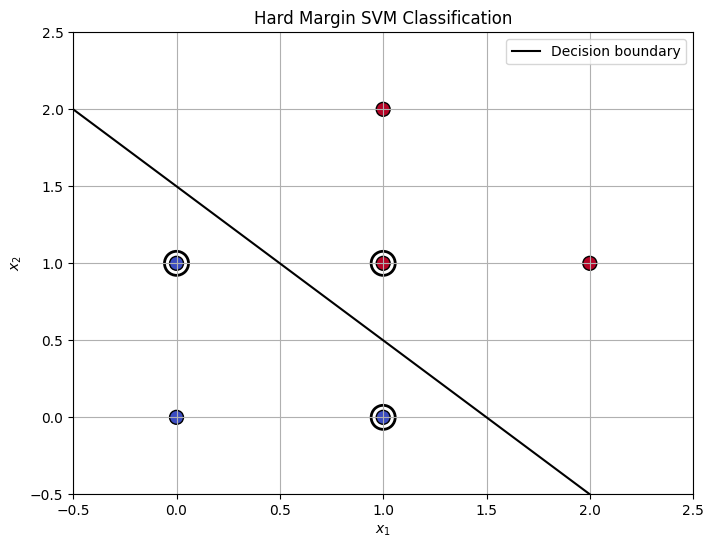

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.array([[1, 1], [1, 2], [2, 1], [0, 0], [1, 0], [0, 1]])
y = np.array([1, 1, 1, -1, -1, -1])

clf = svm.SVC(kernel='linear', C=1000000)  
clf.fit(X, y)

support_vectors = clf.support_vectors_
support_vector_indices = clf.support_

print(f"Support vectors: \n{support_vectors}")

w = clf.coef_[0]
b = clf.intercept_[0]

plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=300, facecolors='none', edgecolors='black', linewidths=2)

a = -w[0] / w[1]
xx = np.linspace(-0.5, 2.5)
yy = a * xx - (b / w[1])
plt.plot(xx, yy, 'k-', label='Decision boundary')

plt.title('Hard Margin SVM Classification')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.axis([-0.5, 2.5, -0.5, 2.5])

plt.show()

## (b -- 15 pts) 

Using the support vectors, find the equation for the maximum margin separating plane, and determine the geometric margin. (Assume a simple linear SVM and no soft-margin). 

For (1,1): $w_1 \cdot 1 + w_2 \cdot 1 + b = 1$, so $w_1 + w_2 + b = 1$ ...(1) 

For (0,0): $w_1 \cdot 0 + w_2 \cdot 0 + b = -1$, so $b = -1$ ...(2)

For (0,1): $w_1 \cdot 0 + w_2 \cdot 1 + b = -1$, so $w_2 + b = -1$ ...(3)

Substitute (2) into (3), we can get $ w_2 = 0$.

Then substitute into (1), we can get $ w_1 = 2$.

So the separating hyperplane is: $2x_1 + 0x_2 - 1 = 0$, which simplifies to $x_1 = \frac{1}{2}$

The geometric margin is: $\gamma = \frac{1}{||\mathbf{w}||}$

Where $||\mathbf{w}||$ is the Euclidean norm of $\mathbf{w}$: $||\mathbf{w}|| = \sqrt{w_1^2 + w_2^2} = 2$

Therefore, the geometric margin is: $\gamma = \frac{1}{2}$